In [1]:
import os

import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import exponential_moving_average

In [2]:
result_dir = "."
result_file_name = "results.pkl"

In [3]:
with open(os.path.join(result_dir, result_file_name), "rb") as f:
    results = pickle.load(f)
    f.close()

In [4]:
results

{'weights': {'gd': array([  3.39709717,   0.13862903,   0.68787016,  -0.14891753,
           9.82551116,   9.8324498 ,  -8.22099243,  -1.86985387,
         -26.60498061,   5.20868767,  -1.29631708,   0.6111802 ,
           1.26628116,   0.71074206,  -5.88808972,   6.83502896]),
  'Adam': array([ 15.10620749, -18.22722005,   2.70621784,   5.29674838,
          16.36403537,  12.37110659, -11.51956154, -16.00185802,
         -28.78341616,   5.3461157 ,  -2.6004948 ,   0.26828651,
           2.52794599,   1.30028012, -41.80452012,  20.93469669]),
  'Momentum': array([  3.39790014,   0.13912971,   0.68835301,  -0.15152713,
           9.82520863,   9.83537557,  -8.22347186,  -1.86985645,
         -26.60828251,   5.20942754,  -1.29722366,   0.61144652,
           1.26646599,   0.71069898,  -5.88735848,   6.83666949]),
  'Adagrad': array([ 3.67620583e-01,  1.30557750e-01, -4.02230763e-01,  1.53217013e-01,
          2.02204484e+00,  2.44604276e-01,  2.55706065e-02, -3.19057900e-02,
          3.

In [5]:
list(results.keys())

['weights',
 'min_val_cost_weights',
 'max_val_acc_weights',
 'train_cost',
 'train_acc',
 'val_cost',
 'val_acc',
 'time_epoch',
 'timestamp_epoch',
 'wolf_II',
 'goldstein']

In [6]:
results["train_cost"]["gd"]

[0.6712738569970759,
 0.653739193626773,
 0.6388513147471079,
 0.625359130535646,
 0.6130622922758918,
 0.6018097124242808,
 0.5914717711854093,
 0.5819368830304423,
 0.573108967171112,
 0.5649052229085196,
 0.5572541963504629,
 0.5500941165231797,
 0.5433714732687666,
 0.5370398073141872,
 0.5310586837508043,
 0.5253928224315729,
 0.5200113616783699,
 0.514887234715542,
 0.5099966411444822,
 0.5053185984171533,
 0.5008345606024416,
 0.49652809376176693,
 0.49238459897729425,
 0.4883910755365234,
 0.4845359180040115,
 0.4808087419372685,
 0.4772002338598395,
 0.4737020218173311,
 0.47030656343514954,
 0.46700704889007116,
 0.4637973166183835,
 0.4606717799253836,
 0.45762536294628686,
 0.45465344464683594,
 0.45175180975118956,
 0.4489166056516658,
 0.44614430449511167,
 0.44343166975859816,
 0.4407757267265331,
 0.43817373636522794,
 0.435623172161997,
 0.43312169955611596,
 0.4306671576401668,
 0.4282575428538989,
 0.4258909944299466,
 0.4235657813825567,
 0.42128029085774504,
 0.419

In [7]:
results["train_cost"]["batch_gd"]

[0.7286628720021072,
 0.7175032819999407,
 0.7122204926490048,
 0.7113973664593227,
 0.700350916622831,
 0.6977994470479629,
 0.692140148722197,
 0.68737177397364,
 0.6877248075789739,
 0.6872523809428389,
 0.6848967871374804,
 0.6770364630711401,
 0.675284723771132,
 0.6713110961998028,
 0.670974913144185,
 0.6692395398353231,
 0.6676861009973456,
 0.6623469225612788,
 0.6592440513194073,
 0.6564305678222218,
 0.6550051030226905,
 0.6526273306353481,
 0.6513854468977709,
 0.6500951913504006,
 0.6485263803790632,
 0.6472788743344297,
 0.6455803375236834,
 0.6437747359350381,
 0.6426542593065984,
 0.6406747731735317,
 0.639128168106208,
 0.63765181984491,
 0.6365021671931278,
 0.6347788091053469,
 0.6333446730508294,
 0.6320682853489943,
 0.6304876019000247,
 0.6291360730292439,
 0.6282123876353677,
 0.6271385838051087,
 0.6257354384692067,
 0.6245810069064944,
 0.6235373498760638,
 0.6222352404625576,
 0.6210992305880061,
 0.6198033339358363,
 0.6186067834037303,
 0.6173239623199566,
 

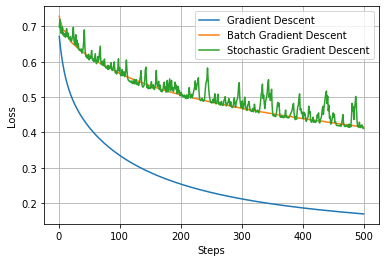

In [8]:
plt.figure(facecolor='w')
plt.plot(np.arange(1, 501), results["train_cost"]["gd"][:500], label="Gradient Descent")
plt.plot(np.arange(1, 501), results["train_cost"]["batch_gd"][:500], label="Batch Gradient Descent")
plt.plot(np.arange(1, 501), results["train_cost"]["stochastic_gd"][:500], label="Stochastic Gradient Descent")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.show()

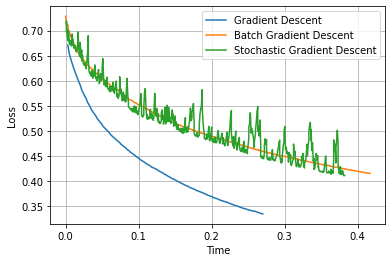

In [9]:
plt.figure(facecolor='w')
plt.plot(results["timestamp_epoch"]["gd"][:100], results["train_cost"]["gd"][:100], label="Gradient Descent")
plt.plot(results["timestamp_epoch"]["batch_gd"][:500], results["train_cost"]["batch_gd"][:500], label="Batch Gradient Descent")
plt.plot(results["timestamp_epoch"]["stochastic_gd"][:500], results["train_cost"]["stochastic_gd"][:500], label="Stochastic Gradient Descent")
plt.xlabel("Time")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

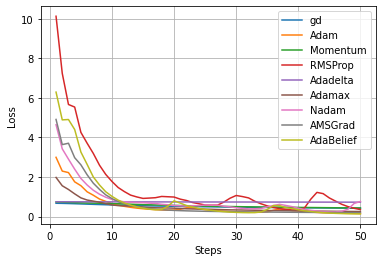

In [15]:
plt.figure(facecolor='w')
for optimizer in list(results["train_cost"].keys())[:10]:
    if "Adagrad" in optimizer:
        continue
    y = results["train_cost"][optimizer][:50]
    y = exponential_moving_average(y, weight=0.3)
    plt.plot(np.arange(1, 51), y, label=optimizer)

plt.legend()
plt.grid()
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.show()

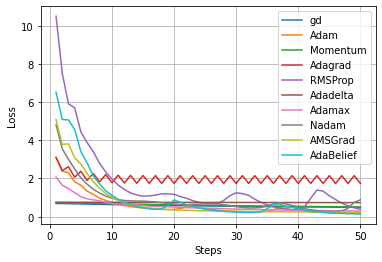

In [11]:
plt.figure(facecolor='w')
for optimizer in list(results["val_cost"].keys())[:10]:
    #if "Adagrad" in optimizer:
    #    continue
    y = results["val_cost"][optimizer][:50]
    y = exponential_moving_average(y, weight=0.3)
    plt.plot(np.arange(1, 51), y, label=optimizer)

plt.legend()
plt.grid()
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.show()

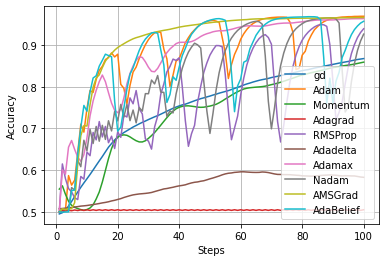

In [12]:
plt.figure(facecolor='w')
for optimizer in list(results["train_acc"].keys())[:10]:
    #if "Adagrad" in optimizer:
    #    continue
    y = results["train_acc"][optimizer][:100]
    y = exponential_moving_average(y, weight=0.3)
    plt.plot(np.arange(1, 101), y, label=optimizer)

plt.legend()
plt.grid()
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.show()

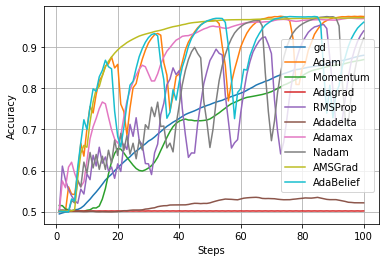

In [13]:
plt.figure(facecolor='w')
for optimizer in list(results["val_acc"].keys())[:10]:
    #if "Adagrad" in optimizer:
    #    continue
    y = results["val_acc"][optimizer][:100]
    y = exponential_moving_average(y, weight=0.3)
    plt.plot(np.arange(1, 101), y, label=optimizer)

plt.legend()
plt.grid()
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.show()

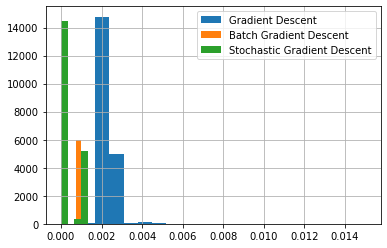

In [14]:
plt.figure(facecolor='w')

plt.hist(results["time_epoch"]["gd"], label="Gradient Descent", bins=20)
plt.hist(results["time_epoch"]["batch_gd"], label="Batch Gradient Descent", bins=10)
plt.hist(results["time_epoch"]["stochastic_gd"], label="Stochastic Gradient Descent", bins=10)

plt.grid()
plt.legend()
plt.show()